In [ ]:
import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'loan-approval-prediction:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1226448%2F2047352%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240718%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240718T161008Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D081f57e1cbd9a97bef6e737fd61ddf0dfdd217b1b66d395e9c760634bdde582dcb7b75330f5685433fbcdd8399f828bebcd70c01836e190225c37a03f1e7a72074e9cfec4832935f6adea1185adee30af5fbd85cdb297e6becf456819b637a72b968154b30263649cb5188a8803d58de7a054275a2dbc225e97fdb455d7dc5212b6dd0eb2beda4c804a2aa3fa93deaa5050cf1c3a539f089694ca698e8b27dd229a2c4a1f10fc1e9e280ec27bd2b795108df79ea523ce5bfe557f6702cb1de00e85d27f7b167b75cc941b6a486acca0f4e9ac07526881e1c6fc6018744f40c91d4c16c83618bcd723f97e97d4f26fa3eff1593ce17d6d710045528f7870f0128'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 13885 bytes downloaded
Downloaded and uncompressed: loan-approval-prediction
Data source import complete.


In [ ]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/loan-approval-prediction/Sample_Submission.csv
/kaggle/input/loan-approval-prediction/Test Dataset.csv
/kaggle/input/loan-approval-prediction/Training Dataset.csv


In [ ]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [ ]:
df=pd.read_csv("../input/loan-approval-prediction/Training Dataset.csv")
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [ ]:
df.shape

(614, 13)

In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


<Axes: xlabel='Loan_Status'>

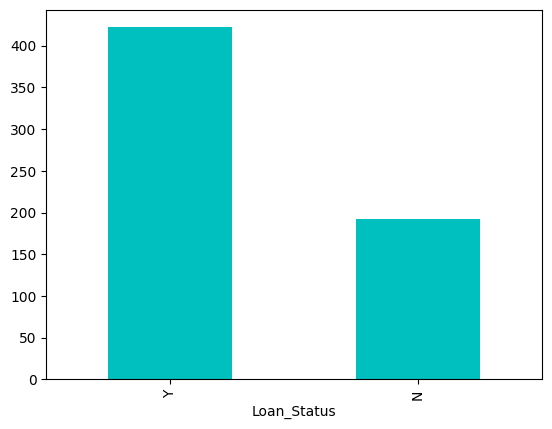

In [ ]:

df["Loan_Status"].value_counts().plot(kind='bar',color='c')

In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

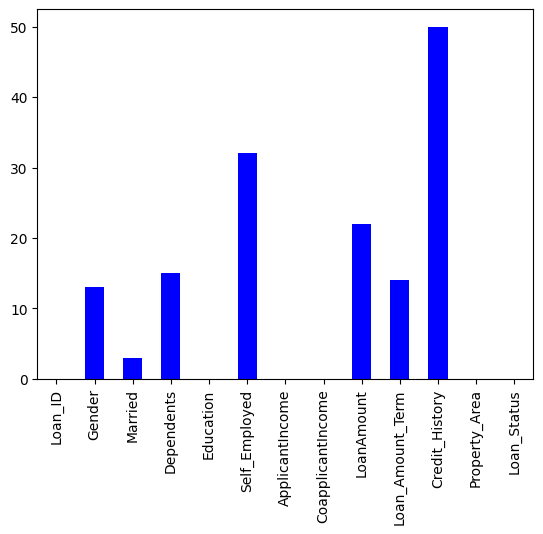

In [ ]:
df.isnull().sum().plot(kind='bar',color = 'blue')

In [ ]:
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [ ]:
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())

<Axes: >

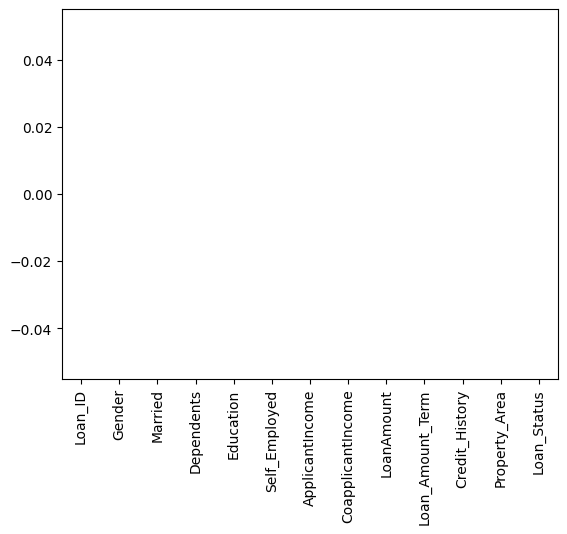

In [ ]:
df.isnull().sum().plot(kind='bar',color = 'black')

In [ ]:
df = df.drop(columns=['Loan_ID']) ## Dropping Loan ID

In [ ]:
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']


print("Categorical Columns in training dataset based on datatypes {}".format(categorical_columns))



Categorical Columns in training dataset based on datatypes ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History', 'Loan_Amount_Term']


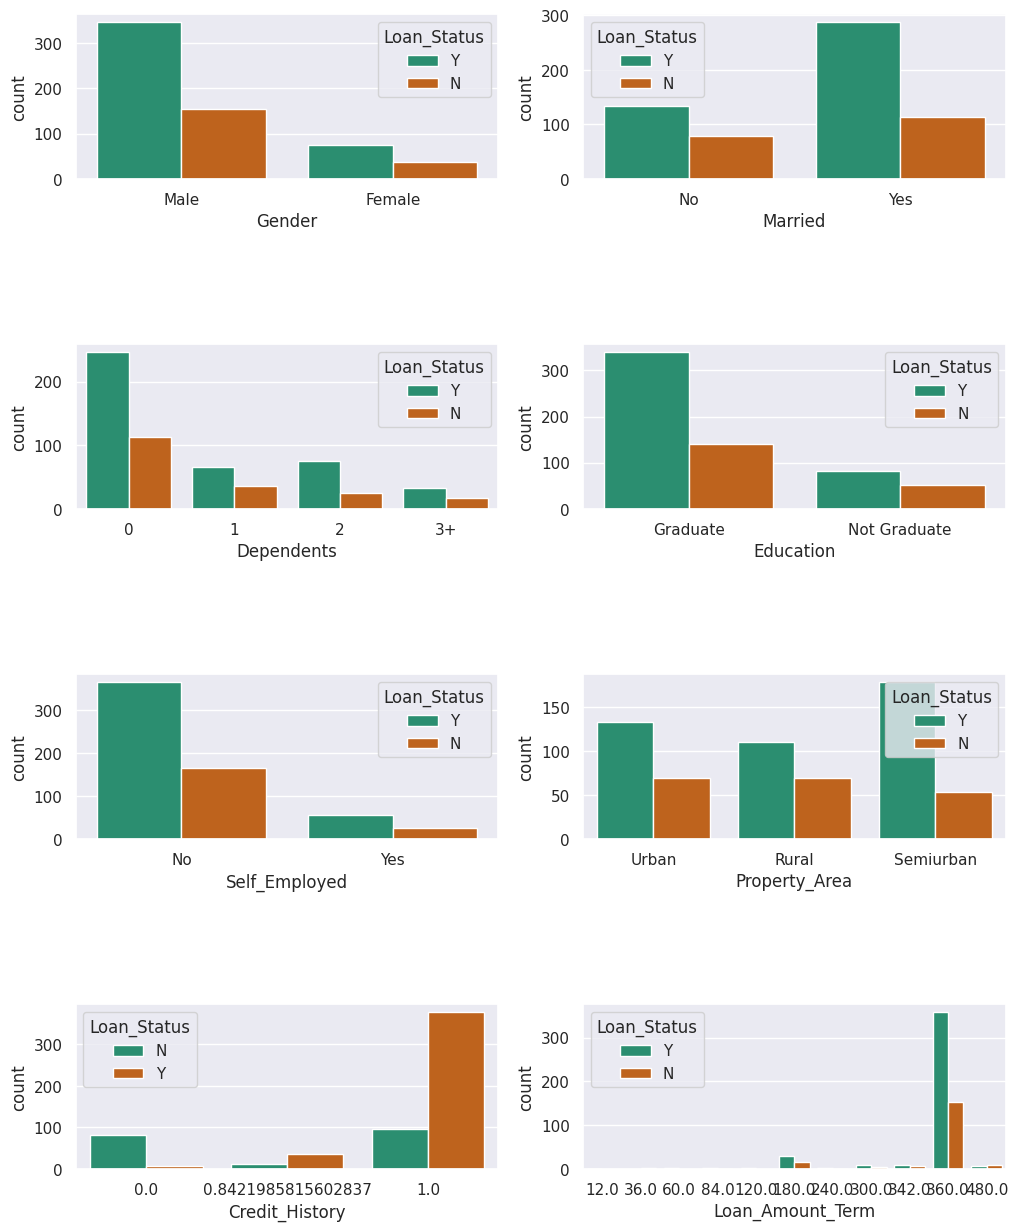

In [ ]:
### Data Visualization libraries
sns.set_theme(style="darkgrid")
fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=df,hue='Loan_Status',ax=axes[row,col],palette="Dark2")

plt.subplots_adjust(hspace=1)

In [ ]:
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
print("Numerical Columns in training dataset based on datatypes {}".format(numerical_columns))

Numerical Columns in training dataset based on datatypes ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


       ApplicantIncome  CoapplicantIncome  LoanAmount
count       614.000000         614.000000  614.000000
mean       5403.459283        1621.245798  146.412162
std        6109.041673        2926.248369   84.037468
min         150.000000           0.000000    9.000000
25%        2877.500000           0.000000  100.250000
50%        3812.500000        1188.500000  129.000000
75%        5795.000000        2297.250000  164.750000
max       81000.000000       41667.000000  700.000000


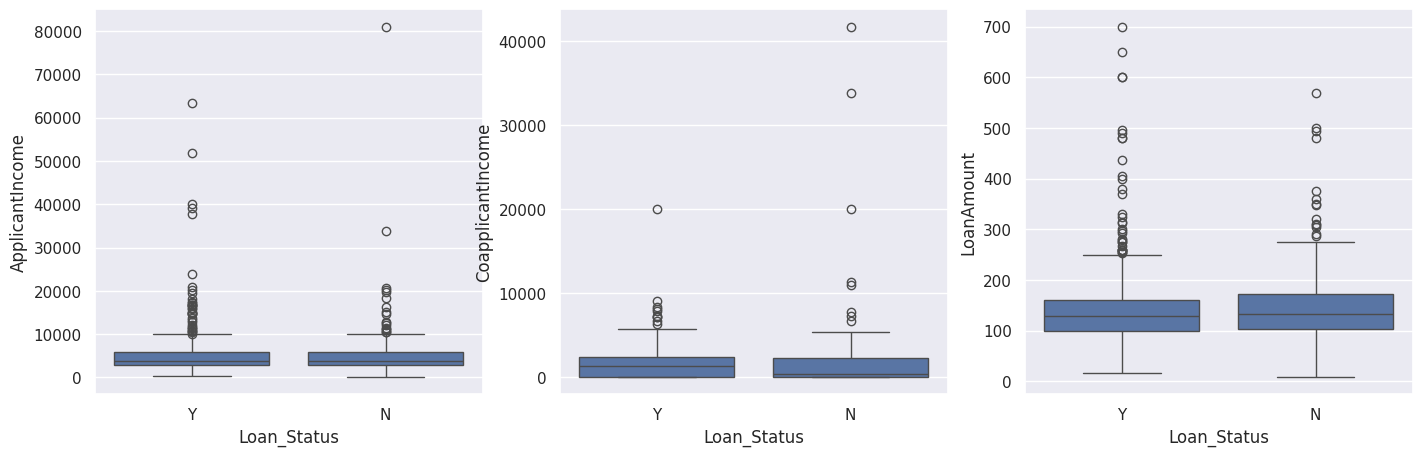

In [ ]:
fig,axes = plt.subplots(1,3,figsize=(17,5))
for idx,cat_col in enumerate(numerical_columns):
    sns.boxplot(y=cat_col,data=df,x='Loan_Status',ax=axes[idx])

print(df[numerical_columns].describe())
plt.subplots_adjust(hspace=1)

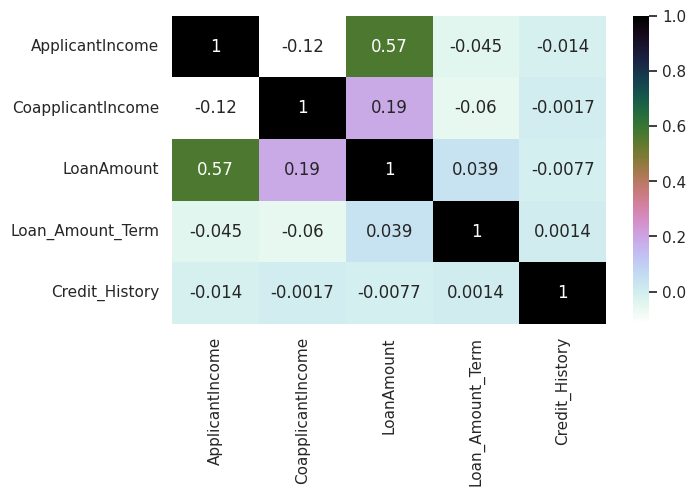

In [ ]:
plt.figure(figsize=(7,4))
sns.heatmap(df[[col for col in df.columns if df[col].dtype!='object']].corr(),annot=True,cmap='cubehelix_r')
plt.show()


In [ ]:
dummy_Gender = pd.get_dummies(df['Gender'], prefix = 'Gender')
dummy_Married = pd.get_dummies(df['Married'], prefix = "Married")
dummy_Education = pd.get_dummies(df['Education'], prefix = "Education")
dummy_Self_Employed = pd.get_dummies(df['Self_Employed'], prefix = "Selfemployed")
dummy_Property_Area = pd.get_dummies(df['Property_Area'], prefix = "Property")
dummy_Dependents = pd.get_dummies(df['Dependents'], prefix = "Dependents")
dummy_Loan_status = pd.get_dummies(df['Loan_Status'], prefix = "Approve")

In [ ]:
frames = [df,dummy_Gender,dummy_Married,dummy_Education,dummy_Self_Employed,dummy_Property_Area,dummy_Dependents,dummy_Loan_status]

In [ ]:
df_train = pd.concat(frames, axis = 1)

In [ ]:
df_train.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,...,Selfemployed_Yes,Property_Rural,Property_Semiurban,Property_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Approve_N,Approve_Y
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,...,False,False,False,True,True,False,False,False,False,True
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,...,False,True,False,False,False,True,False,False,True,False
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,...,True,False,False,True,True,False,False,False,False,True
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,...,False,False,False,True,True,False,False,False,False,True
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,...,False,False,False,True,True,False,False,False,False,True
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.0,...,True,False,False,True,False,False,True,False,False,True
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.000000,360.0,1.0,...,False,False,False,True,True,False,False,False,False,True
7,Male,Yes,3+,Graduate,No,3036,2504.0,158.000000,360.0,0.0,...,False,False,True,False,False,False,False,True,True,False
8,Male,Yes,2,Graduate,No,4006,1526.0,168.000000,360.0,1.0,...,False,False,False,True,False,False,True,False,False,True
9,Male,Yes,1,Graduate,No,12841,10968.0,349.000000,360.0,1.0,...,False,False,True,False,False,True,False,False,True,False


In [ ]:
df_train.shape

(614, 29)

In [ ]:
df_train = df_train.drop(columns = [ 'Gender', 'Married', 'Dependents', 'Education','Self_Employed', 'Property_Area','Loan_Status','Approve_N'])

In [ ]:
df_train.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Education_Graduate',
       'Education_Not Graduate', 'Selfemployed_No', 'Selfemployed_Yes',
       'Property_Rural', 'Property_Semiurban', 'Property_Urban',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Approve_Y'],
      dtype='object')

In [ ]:
df_train.shape

(614, 21)

In [ ]:
df=pd.read_csv("../input/loan-approval-prediction/Test Dataset.csv")
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


In [ ]:
df.shape

(367, 12)

In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

<Axes: >

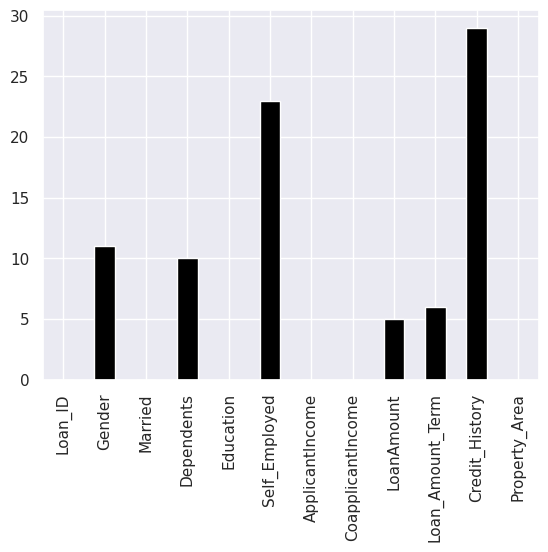

In [ ]:
df.isnull().sum().plot(kind='bar',color = 'black')

In [ ]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])


In [ ]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())


<Axes: >

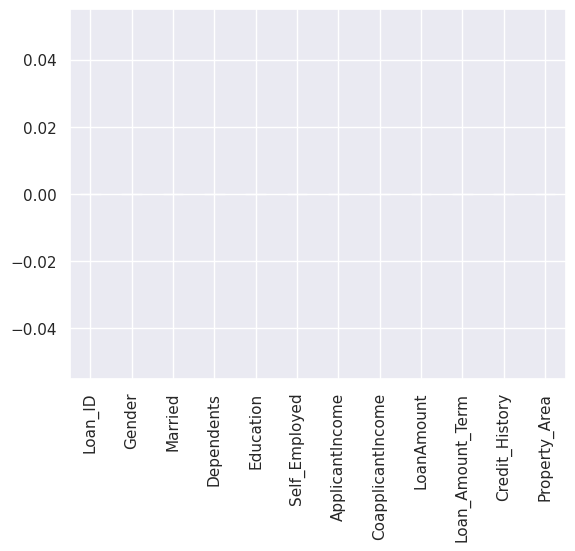

In [ ]:
df.isnull().sum().plot(kind='bar',color = 'blue')

In [ ]:
df = df.drop(columns=['Loan_ID']) ## Dropping Loan ID

In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,367.000000,367.000000,367.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,60.946040,64.620366,0.364778
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,101.000000,360.000000,1.000000
50%,3786.000000,1025.000000,126.000000,360.000000,1.000000
75%,5060.000000,2430.500000,157.500000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


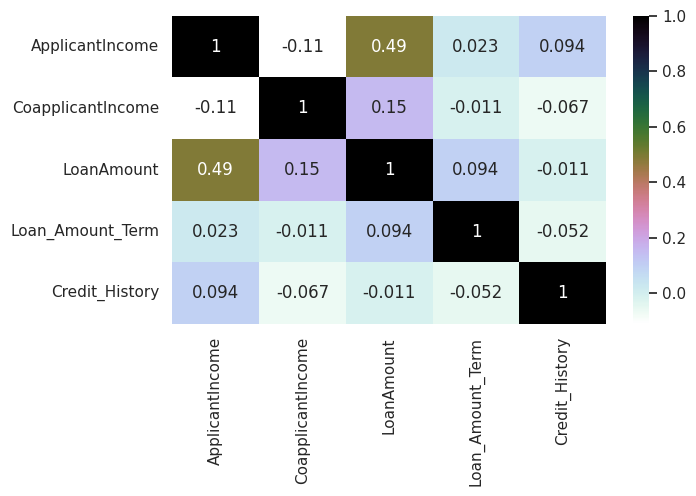

In [ ]:
#Checking the correlation...........................
plt.figure(figsize=(7,4)) #7 is the size of the width and 4 is parts....
sns.heatmap(df[[col for col in df.columns if df[col].dtype!='object']].corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

In [ ]:
dummy_Gender = pd.get_dummies(df['Gender'], prefix = 'Gender')
dummy_Married = pd.get_dummies(df['Married'], prefix = "Married")
dummy_Education = pd.get_dummies(df['Education'], prefix = "Education")
dummy_Self_Employed = pd.get_dummies(df['Self_Employed'], prefix = "Selfemployed")
dummy_Property_Area = pd.get_dummies(df['Property_Area'], prefix = "Property")
dummy_Dependents = pd.get_dummies(df['Dependents'], prefix = "Dependents")




frames = [df,dummy_Gender,dummy_Married,dummy_Education,dummy_Self_Employed,dummy_Property_Area,dummy_Dependents]
df_test = pd.concat(frames, axis = 1)

df_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,...,Education_Not Graduate,Selfemployed_No,Selfemployed_Yes,Property_Rural,Property_Semiurban,Property_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.000000,...,False,True,False,False,False,True,True,False,False,False
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.000000,...,False,True,False,False,False,True,False,True,False,False
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.000000,...,False,True,False,False,False,True,False,False,True,False
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,0.825444,...,False,True,False,False,False,True,False,False,True,False
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.000000,...,True,True,False,False,False,True,True,False,False,False


In [ ]:
df_test = df_test.drop(columns = [ 'Gender', 'Married', 'Dependents', 'Education','Self_Employed', 'Property_Area'])
df_test.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Education_Graduate',
       'Education_Not Graduate', 'Selfemployed_No', 'Selfemployed_Yes',
       'Property_Rural', 'Property_Semiurban', 'Property_Urban',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+'],
      dtype='object')

In [ ]:
df_test.shape

(367, 20)

In [ ]:
df_test.shape

(367, 20)

In [ ]:
Final_df=pd.concat([df_train,df_test],axis=0)
Final_df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,...,Selfemployed_No,Selfemployed_Yes,Property_Rural,Property_Semiurban,Property_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Approve_Y
0,5849,0.0,146.412162,360.0,1.0,False,True,True,False,True,...,True,False,False,False,True,True,False,False,False,True
1,4583,1508.0,128.000000,360.0,1.0,False,True,False,True,True,...,True,False,True,False,False,False,True,False,False,False
2,3000,0.0,66.000000,360.0,1.0,False,True,False,True,True,...,False,True,False,False,True,True,False,False,False,True
3,2583,2358.0,120.000000,360.0,1.0,False,True,False,True,False,...,True,False,False,False,True,True,False,False,False,True
4,6000,0.0,141.000000,360.0,1.0,False,True,True,False,True,...,True,False,False,False,True,True,False,False,False,True


In [ ]:
Final_df.shape

(981, 21)

In [ ]:
Final_df['Approve_Y']

0       True
1      False
2       True
3       True
4       True
       ...  
362      NaN
363      NaN
364      NaN
365      NaN
366      NaN
Name: Approve_Y, Length: 981, dtype: object

<Axes: xlabel='Approve_Y'>

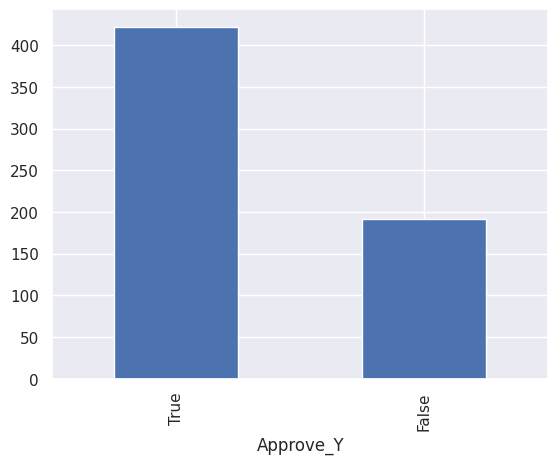

In [ ]:
Final_df['Approve_Y'].value_counts().plot(kind='bar')

In [ ]:
Final_df["Approve_Y"].isna().sum()

367

In [ ]:
Train_df=Final_df.iloc[:614,:]
Test_df=Final_df.iloc[614:,:]

In [ ]:
Train_df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,...,Selfemployed_No,Selfemployed_Yes,Property_Rural,Property_Semiurban,Property_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Approve_Y
0,5849,0.0,146.412162,360.0,1.0,False,True,True,False,True,...,True,False,False,False,True,True,False,False,False,True
1,4583,1508.0,128.000000,360.0,1.0,False,True,False,True,True,...,True,False,True,False,False,False,True,False,False,False
2,3000,0.0,66.000000,360.0,1.0,False,True,False,True,True,...,False,True,False,False,True,True,False,False,False,True
3,2583,2358.0,120.000000,360.0,1.0,False,True,False,True,False,...,True,False,False,False,True,True,False,False,False,True
4,6000,0.0,141.000000,360.0,1.0,False,True,True,False,True,...,True,False,False,False,True,True,False,False,False,True


In [ ]:
Train_df.shape

(614, 21)

In [ ]:
Test_df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,...,Selfemployed_No,Selfemployed_Yes,Property_Rural,Property_Semiurban,Property_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Approve_Y
0,5720,0.0,110.0,360.0,1.000000,False,True,False,True,True,...,True,False,False,False,True,True,False,False,False,NaN
1,3076,1500.0,126.0,360.0,1.000000,False,True,False,True,True,...,True,False,False,False,True,False,True,False,False,NaN
2,5000,1800.0,208.0,360.0,1.000000,False,True,False,True,True,...,True,False,False,False,True,False,False,True,False,NaN
3,2340,2546.0,100.0,360.0,0.825444,False,True,False,True,True,...,True,False,False,False,True,False,False,True,False,NaN
4,3276,0.0,78.0,360.0,1.000000,False,True,True,False,False,...,True,False,False,False,True,True,False,False,False,NaN


In [ ]:
Test_df.shape

(367, 21)

In [ ]:
X_train=Train_df.drop(['Approve_Y'],axis=1)
y_train=Train_df['Approve_Y']

In [ ]:
X_train.shape

(614, 20)

In [ ]:
y_train.shape

(614,)

In [ ]:
from sklearn.linear_model import LogisticRegression ,Lasso
from sklearn.ensemble import RandomForestClassifier ,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve ,KFold
from sklearn.metrics import roc_curve,accuracy_score,f1_score,auc,confusion_matrix,roc_auc_score
from xgboost.sklearn import XGBClassifier

In [ ]:
if not isinstance(y_train, (pd.Series, np.ndarray)):
    y_train = np.array(y_train)

# Convert boolean target to integers
y_train = y_train.astype(int)

# Verify the type and unique values of y_train
print(f"Type of y_train: {type(y_train)}")
print(f"Unique values in y_train: {np.unique(y_train)}")

# Define k-fold cross-validation
kfold = StratifiedKFold(n_splits=8, shuffle=True, random_state=42)

# Random state
rs = 15

# List of classifiers
clrs = [
    AdaBoostClassifier(random_state=rs),
    GradientBoostingClassifier(random_state=rs),
    RandomForestClassifier(random_state=rs),
    LogisticRegression(random_state=rs, max_iter=1000),
    ExtraTreesClassifier(random_state=rs)
]

# Perform cross-validation
cv_results = []
for clr in clrs:
    cv_results.append(cross_val_score(clr, X_train, y_train, scoring='accuracy', cv=kfold, n_jobs=-1))

# Calculate means and standard deviations
cv_means = [result.mean() for result in cv_results]
cv_std = [result.std() for result in cv_results]

# Create a DataFrame with the results
cv_df = pd.DataFrame({
    "Algorithm": [
        "AdaBoostClassifier",
        "GradientBoostingClassifier",
        "RandomForestClassifier",
        "LogisticRegression",
        "ExtraTreesClassifier"
    ],
    "CrossVal_Score_Means": cv_means,
    "CrossVal_Std_Errors": cv_std
})


Type of y_train: <class 'pandas.core.series.Series'>
Unique values in y_train: [0 1]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train,test_size=0.2,random_state=4)

In [ ]:
# Gradient boosting tunning

GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1]
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 0)

gsGBC.fit(X_train,y_train)
GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_,gsGBC.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


(0.7107681121099947,
 {'learning_rate': 0.05,
  'loss': 'deviance',
  'max_depth': 8,
  'max_features': 0.3,
  'min_samples_leaf': 100,
  'n_estimators': 200})

In [ ]:
# RFC Parameters tunning
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [2, 3],
              "min_samples_split": [7, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}



rf_param_grid = {
    'max_features':['auto'], 'oob_score':[True], 'random_state':[1],
    "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5], "min_samples_split" : [ 4, 10 ], "n_estimators": [ 100, 400, 700]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 0)

gsRFC.fit(X_train,y_train)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_, gsRFC.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


(0.8127313590692755,
 {'criterion': 'gini',
  'max_features': 'auto',
  'min_samples_leaf': 5,
  'min_samples_split': 4,
  'n_estimators': 100,
  'oob_score': True,
  'random_state': 1})

In [ ]:
# Logistic regression Parameters tunning
LRClr = LogisticRegression()


## Search grid for optimal parameters
LRClr_param_grid = {'penalty':['l2','l1'],'C':[1,10,100],'random_state':[rs]}

gsLRClr=GridSearchCV(LRClr,param_grid = LRClr_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 0)



gsLRClr.fit(X_train,y_train)

LRClr_best = gsLRClr.best_estimator_

# Best score
gsLRClr.best_score_, gsLRClr.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
24 fits failed out of a total of 48.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

(0.8046007403490216, {'C': 1, 'penalty': 'l2', 'random_state': 15})

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X_train)

array([[-2.07879305e+03, -1.65764264e+03,  2.20179845e+01, ...,
        -4.24697537e-17, -4.55704181e-17,  1.57041331e-17],
       [-2.47461923e+03,  1.34727855e+03,  9.03637637e+00, ...,
         9.51674942e-17,  1.87929407e-16,  2.89210829e-17],
       [-2.81203969e+03,  3.23980679e+02, -6.47016844e+00, ...,
         1.13587810e-16, -5.04805524e-18, -3.18702981e-18],
       ...,
       [ 1.64045978e+03, -1.47148238e+03,  3.45830830e-01, ...,
         2.98569930e-17, -5.48525598e-17, -2.37655278e-18],
       [-1.19116432e+03, -8.76621339e+02, -2.97100355e+01, ...,
        -2.64615920e-17,  7.46545901e-18,  1.98784704e-18],
       [-3.80744942e+03,  7.24690795e+03, -1.63947387e+01, ...,
         3.75848377e-17,  4.97529238e-17,  1.26442466e-17]])

In [ ]:
#covariance
covariance=pca.get_covariance()

In [ ]:
explained_variance=pca.explained_variance_
explained_variance

array([4.37427561e+07, 5.86545030e+06, 4.75532376e+03, 3.87444854e+03,
       5.78603703e-01, 3.78789550e-01, 3.34662905e-01, 2.94748007e-01,
       2.65912095e-01, 2.23659878e-01, 2.03987704e-01, 1.55644512e-01,
       1.20717664e-01, 9.52500373e-02, 2.13402858e-32, 1.41460389e-32,
       1.12556047e-32, 4.79968991e-33, 2.59701974e-33, 5.77265670e-35])

In [ ]:
len(explained_variance)

20

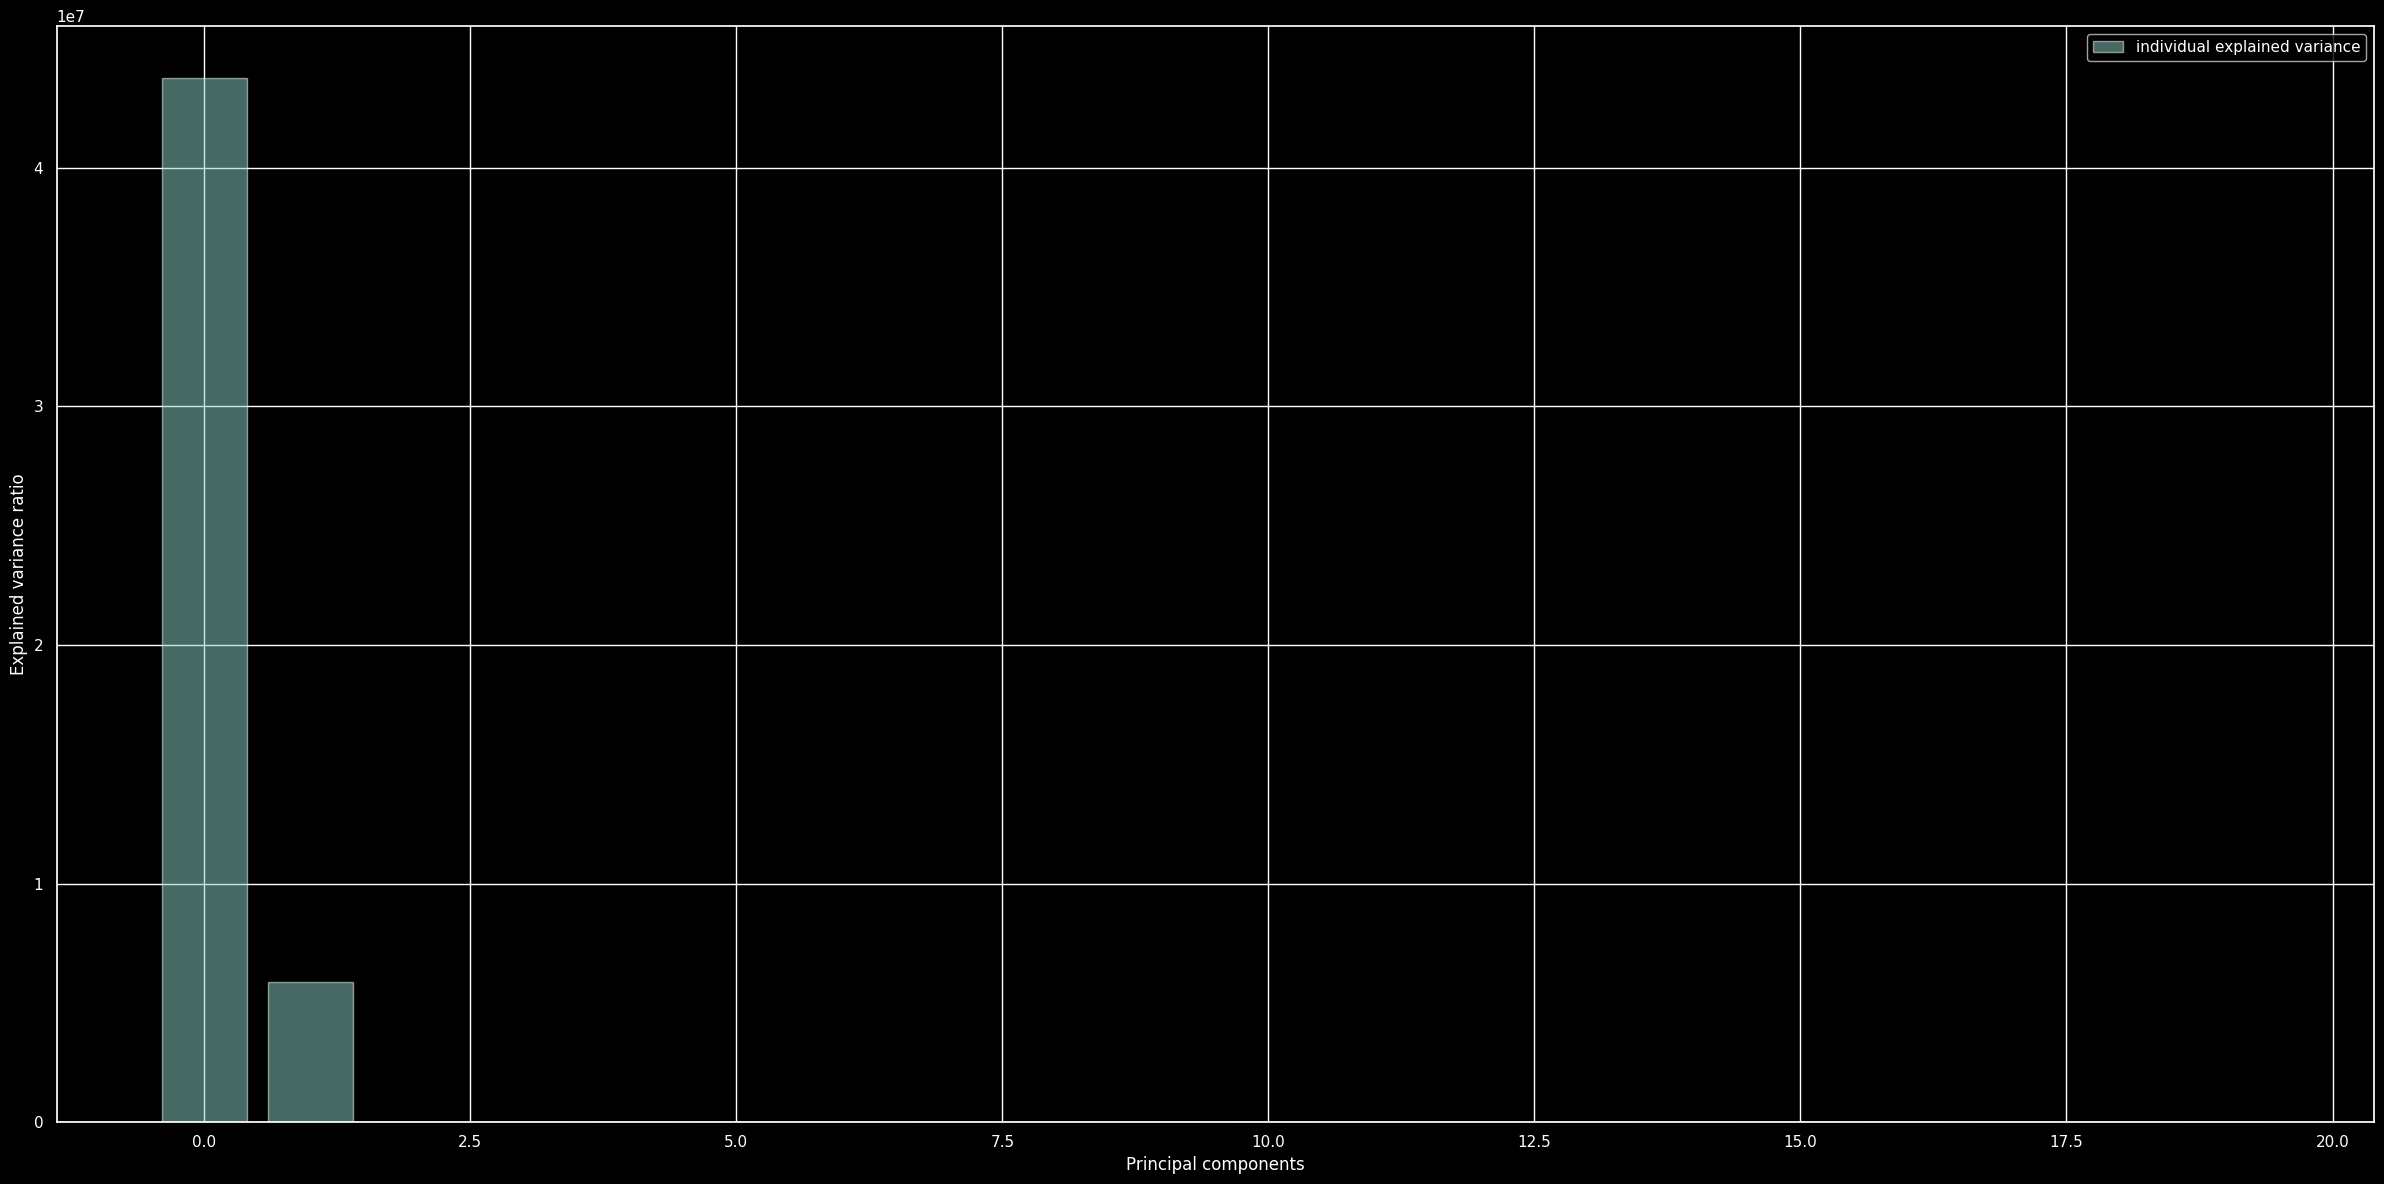

In [ ]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(24, 12))

    plt.bar(range(20), explained_variance, alpha=0.5, align='center',label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

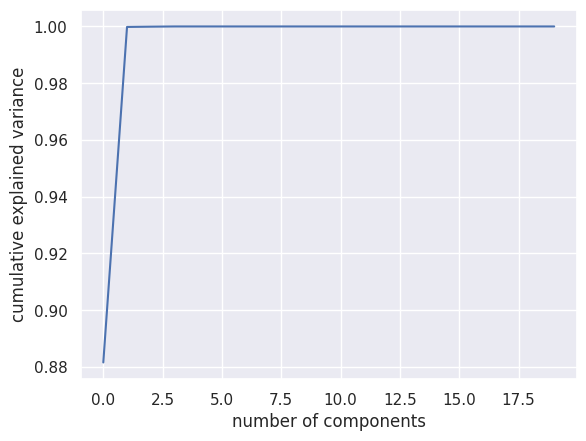

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
pca=PCA(n_components=18)
pca.fit_transform(X_train)


array([[-2.07879305e+03, -1.65764264e+03,  2.20179845e+01, ...,
         5.55064770e-16,  2.92737016e-16, -4.24697537e-17],
       [-2.47461923e+03,  1.34727855e+03,  9.03637637e+00, ...,
         4.08239421e-16, -4.86373126e-17,  9.51674942e-17],
       [-2.81203969e+03,  3.23980679e+02, -6.47016844e+00, ...,
        -1.33987038e-17,  2.55843844e-16,  1.13587810e-16],
       ...,
       [ 1.64045978e+03, -1.47148238e+03,  3.45830830e-01, ...,
        -9.26050173e-17, -8.13516253e-17,  2.98569930e-17],
       [-1.19116432e+03, -8.76621339e+02, -2.97100355e+01, ...,
        -2.05892879e-16, -1.40901129e-16, -2.64615920e-17],
       [-3.80744942e+03,  7.24690795e+03, -1.63947387e+01, ...,
        -3.64335092e-17,  2.32073817e-17,  3.75848377e-17]])

In [ ]:

rs = 15
clrs = []

clrs.append(AdaBoostClassifier(random_state=rs))
clrs.append(GradientBoostingClassifier(random_state=rs))
clrs.append(RandomForestClassifier(random_state=rs))
clrs.append(LogisticRegression(random_state = rs))
clrs.append(ExtraTreesClassifier(random_state = rs))


cv_results = []
for clr in clrs :
    cv_results.append(cross_val_score(clr, X_train, y_train , scoring = 'accuracy', cv = kfold, n_jobs=-1))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_df = pd.DataFrame({"CrossVal_Score_Means":cv_means,"CrossValerrors": cv_std,"Algo":["RandomForestClassifier","Logistic Regression","AdaBoostClassifier","Gradient Boosting",'ExtraTreesClassifier']})

In [ ]:
df1=pd.read_csv("../input/loan-approval-prediction/Training Dataset.csv")
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


<Axes: >

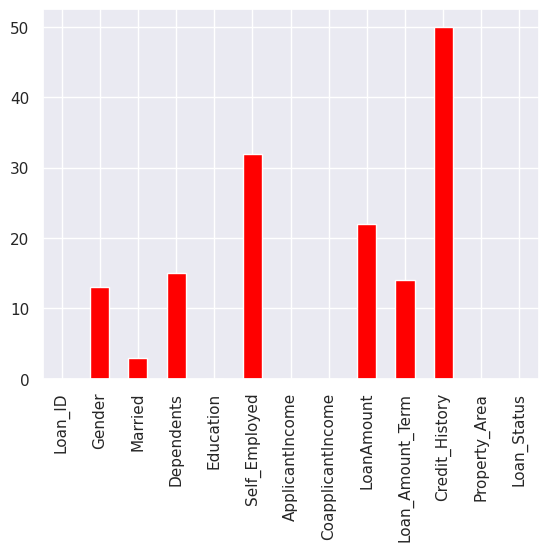

In [ ]:
df1.isnull().sum().plot(kind='bar',color = 'red')

In [ ]:
df1['Credit_History']=df1['Credit_History'].fillna(df1['Credit_History'].mean())
df1['Loan_Amount_Term']=df1['Loan_Amount_Term'].fillna(df1['Loan_Amount_Term'].mean())
df1['LoanAmount']=df1['LoanAmount'].fillna(df1['LoanAmount'].mean())
df1['Dependents']=df1['Dependents'].fillna(df1['Dependents'].mode()[0])
df1['Gender']=df1['Gender'].fillna(df1['Gender'].mode()[0])
df1['Married']=df1['Married'].fillna(df1['Married'].mode()[0])
df1['Self_Employed']=df1['Self_Employed'].fillna(df1['Self_Employed'].mode()[0])

<Axes: >

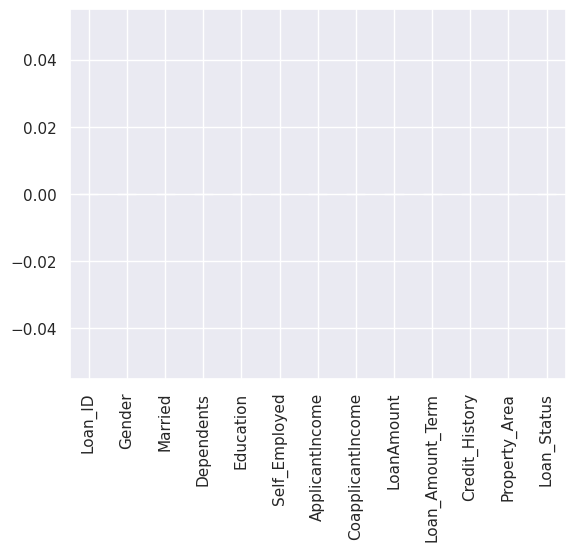

In [ ]:
df1.isnull().sum().plot(kind='bar',color = 'GREEN')

In [ ]:
df1 = df1.drop(columns=['Loan_ID']) ## Dropping Loan ID

In [ ]:
df2=pd.read_csv("../input/loan-approval-prediction/Test Dataset.csv")
df2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


<Axes: >

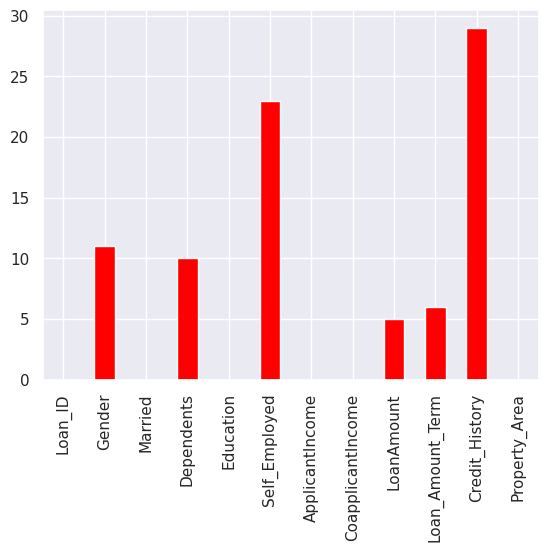

In [ ]:
df2.isnull().sum().plot(kind='bar',color = 'red')

In [ ]:
df2['Gender']=df2['Gender'].fillna(df2['Gender'].mode()[0])
df2['Dependents']=df2['Dependents'].fillna(df2['Dependents'].mode()[0])
df2['Self_Employed']=df2['Self_Employed'].fillna(df2['Self_Employed'].mode()[0])
df2['LoanAmount']=df2['LoanAmount'].fillna(df2['LoanAmount'].mean())
df2['Loan_Amount_Term']=df2['Loan_Amount_Term'].fillna(df2['Loan_Amount_Term'].mean())
df2['Credit_History']=df2['Credit_History'].fillna(df2['Credit_History'].mean())

<Axes: >

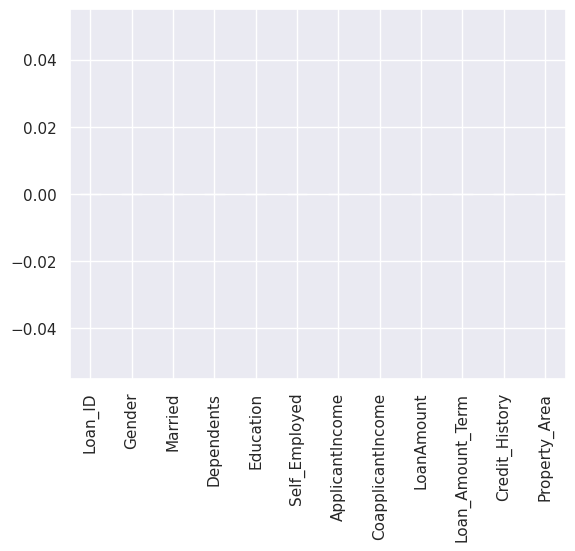

In [ ]:
df2.isnull().sum().plot(kind='bar',color = 'Green')

In [ ]:
## Dropping Loan ID
df2=df2.drop(columns=['Loan_ID'])

In [ ]:
data=pd.concat([df1,df2],axis=0)

In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [ ]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
import scipy.stats as stats
from scipy.stats import chi2_contingency

class ChiSquare:
    def __init__(self, dataframe):
        self.data = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None

        self.dfObserved = None
        self.dfExpected = None

    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="{0} is IMPORTANT for Prediction".format(colX)
        else:
            result="{0} is NOT an important predictor. (Discard {0} from model)".format(colX)

        print(result)

    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.data[colX].astype(str)
        Y = self.data[colY].astype(str)

        self.dfObserved = pd.crosstab(Y,X)
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof

        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)

        self._print_chisquare_result(colX,alpha)


In [ ]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
#Initialize ChiSquare Class
cT = ChiSquare(data)

#Feature Selection
testColumns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']


for var in testColumns:
    cT.TestIndependence(colX=var,colY="Loan_Status" )

Gender is NOT an important predictor. (Discard Gender from model)
Married is NOT an important predictor. (Discard Married from model)
Dependents is NOT an important predictor. (Discard Dependents from model)
Education is NOT an important predictor. (Discard Education from model)
Self_Employed is NOT an important predictor. (Discard Self_Employed from model)
ApplicantIncome is NOT an important predictor. (Discard ApplicantIncome from model)
CoapplicantIncome is NOT an important predictor. (Discard CoapplicantIncome from model)
LoanAmount is NOT an important predictor. (Discard LoanAmount from model)
Loan_Amount_Term is IMPORTANT for Prediction
Credit_History is IMPORTANT for Prediction
Property_Area is IMPORTANT for Prediction
Loan_Status is IMPORTANT for Prediction


In [ ]:
#Drop insignficant variables

data.drop(columns=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'],inplace = True)

In [ ]:
#Encoding Categorical Variables
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in data.columns:
    data[col] = labelencoder.fit_transform(data[col])

    #Now one hot encoding
data=pd.get_dummies(data, columns=["Loan_Amount_Term","Credit_History","Property_Area"],drop_first=False)

In [ ]:
data.head()

,Loan_Status,Loan_Amount_Term_0,Loan_Amount_Term_1,Loan_Amount_Term_2,Loan_Amount_Term_3,Loan_Amount_Term_4,Loan_Amount_Term_5,Loan_Amount_Term_6,Loan_Amount_Term_7,Loan_Amount_Term_8,...,Loan_Amount_Term_11,Loan_Amount_Term_12,Loan_Amount_Term_13,Credit_History_0,Credit_History_1,Credit_History_2,Credit_History_3,Property_Area_0,Property_Area_1,Property_Area_2
0,1,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,True
1,0,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,True,True,False,False
2,1,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,True
3,1,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,True
4,1,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,True


In [ ]:
data.columns

Index(['Loan_Status', 'Loan_Amount_Term_0', 'Loan_Amount_Term_1',
       'Loan_Amount_Term_2', 'Loan_Amount_Term_3', 'Loan_Amount_Term_4',
       'Loan_Amount_Term_5', 'Loan_Amount_Term_6', 'Loan_Amount_Term_7',
       'Loan_Amount_Term_8', 'Loan_Amount_Term_9', 'Loan_Amount_Term_10',
       'Loan_Amount_Term_11', 'Loan_Amount_Term_12', 'Loan_Amount_Term_13',
       'Credit_History_0', 'Credit_History_1', 'Credit_History_2',
       'Credit_History_3', 'Property_Area_0', 'Property_Area_1',
       'Property_Area_2'],
      dtype='object')

In [ ]:
#Rearranged the order of the dataframe....
data = data[['Loan_Amount_Term_0', 'Loan_Amount_Term_1',
       'Loan_Amount_Term_2', 'Loan_Amount_Term_3', 'Loan_Amount_Term_4',
       'Loan_Amount_Term_5', 'Loan_Amount_Term_6', 'Loan_Amount_Term_7',
       'Loan_Amount_Term_8', 'Loan_Amount_Term_9', 'Loan_Amount_Term_10',
       'Loan_Amount_Term_11', 'Loan_Amount_Term_12', 'Loan_Amount_Term_13',
       'Credit_History_0', 'Credit_History_1', 'Credit_History_2',
       'Credit_History_3', 'Property_Area_0', 'Property_Area_1',
       'Property_Area_2','Loan_Status']]
data.head()

,Loan_Amount_Term_0,Loan_Amount_Term_1,Loan_Amount_Term_2,Loan_Amount_Term_3,Loan_Amount_Term_4,Loan_Amount_Term_5,Loan_Amount_Term_6,Loan_Amount_Term_7,Loan_Amount_Term_8,Loan_Amount_Term_9,...,Loan_Amount_Term_12,Loan_Amount_Term_13,Credit_History_0,Credit_History_1,Credit_History_2,Credit_History_3,Property_Area_0,Property_Area_1,Property_Area_2,Loan_Status
0,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,True,1
1,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,True,True,False,False,0
2,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,True,1
3,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,True,1
4,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,True,1


In [ ]:
#Separating features and label
X=data.drop(['Loan_Status'],axis=1)
y=data['Loan_Status']

In [ ]:
rs = 15
clrs = []

clrs.append(AdaBoostClassifier(random_state=rs))
clrs.append(GradientBoostingClassifier(random_state=rs))
clrs.append(RandomForestClassifier(random_state=rs))
clrs.append(LogisticRegression(random_state = rs))
clrs.append(ExtraTreesClassifier(random_state = rs))


cv_results = []
for clr in clrs :
    cv_results.append(cross_val_score(clr, X_train, y_train , scoring = 'accuracy', cv = kfold, n_jobs=-1))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_df = pd.DataFrame({"CrossVal_Score_Means":cv_means,"CrossValerrors": cv_std,"Algo":["RandomForestClassifier","Logistic Regression","AdaBoostClassifier","Gradient Boosting",'ExtraTreesClassifier']})

In [ ]:
df1=pd.read_csv("../input/loan-approval-prediction/Training Dataset.csv")
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df1.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
#Lets handle its missing values
df1['Credit_History']=df1['Credit_History'].fillna(df1['Credit_History'].mean())
df1['Loan_Amount_Term']=df1['Loan_Amount_Term'].fillna(df1['Loan_Amount_Term'].mean())
df1['LoanAmount']=df1['LoanAmount'].fillna(df1['LoanAmount'].mean())
df1['Dependents']=df1['Dependents'].fillna(df1['Dependents'].mode()[0])
df1['Gender']=df1['Gender'].fillna(df1['Gender'].mode()[0])
df1['Married']=df1['Married'].fillna(df1['Married'].mode()[0])
df1['Self_Employed']=df1['Self_Employed'].fillna(df1['Self_Employed'].mode()[0])

In [ ]:
df1.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
df2=pd.read_csv("../input/loan-approval-prediction/Test Dataset.csv")
df2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
df2.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [ ]:
df2['Gender']=df2['Gender'].fillna(df2['Gender'].mode()[0])
df2['Dependents']=df2['Dependents'].fillna(df2['Dependents'].mode()[0])
df2['Self_Employed']=df2['Self_Employed'].fillna(df2['Self_Employed'].mode()[0])
df2['LoanAmount']=df2['LoanAmount'].fillna(df2['LoanAmount'].mean())
df2['Loan_Amount_Term']=df2['Loan_Amount_Term'].fillna(df2['Loan_Amount_Term'].mean())
df2['Credit_History']=df2['Credit_History'].fillna(df2['Credit_History'].mean())

In [ ]:
df2.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [ ]:
data=pd.concat([df1,df2],axis=0)

In [ ]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [ ]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
#Drop insignficant variables
data = data.drop(columns = ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'])


In [ ]:
data.head()

,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,360.0,1.0,Urban,Y
1,360.0,1.0,Rural,N
2,360.0,1.0,Urban,Y
3,360.0,1.0,Urban,Y
4,360.0,1.0,Urban,Y


In [ ]:
#Encoding Categorical Variables
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in data.columns:
    data[col] = labelencoder.fit_transform(data[col])

    #Now one hot encoding
data=pd.get_dummies(data, columns=["Loan_Amount_Term","Credit_History","Property_Area"],drop_first=False)

In [ ]:
data.head()

,Loan_Status,Loan_Amount_Term_0,Loan_Amount_Term_1,Loan_Amount_Term_2,Loan_Amount_Term_3,Loan_Amount_Term_4,Loan_Amount_Term_5,Loan_Amount_Term_6,Loan_Amount_Term_7,Loan_Amount_Term_8,...,Loan_Amount_Term_11,Loan_Amount_Term_12,Loan_Amount_Term_13,Credit_History_0,Credit_History_1,Credit_History_2,Credit_History_3,Property_Area_0,Property_Area_1,Property_Area_2
0,1,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,True
1,0,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,True,True,False,False
2,1,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,True
3,1,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,True
4,1,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,True


In [ ]:
#Rearranged the order of the dataframe....
data = data[['Loan_Amount_Term_0', 'Loan_Amount_Term_1',
       'Loan_Amount_Term_2', 'Loan_Amount_Term_3', 'Loan_Amount_Term_4',
       'Loan_Amount_Term_5', 'Loan_Amount_Term_6', 'Loan_Amount_Term_7',
       'Loan_Amount_Term_8', 'Loan_Amount_Term_9', 'Loan_Amount_Term_10',
       'Loan_Amount_Term_11', 'Loan_Amount_Term_12', 'Loan_Amount_Term_13',
       'Credit_History_0', 'Credit_History_1', 'Credit_History_2',
       'Credit_History_3', 'Property_Area_0', 'Property_Area_1',
       'Property_Area_2','Loan_Status']]
data.head()

,Loan_Amount_Term_0,Loan_Amount_Term_1,Loan_Amount_Term_2,Loan_Amount_Term_3,Loan_Amount_Term_4,Loan_Amount_Term_5,Loan_Amount_Term_6,Loan_Amount_Term_7,Loan_Amount_Term_8,Loan_Amount_Term_9,...,Loan_Amount_Term_12,Loan_Amount_Term_13,Credit_History_0,Credit_History_1,Credit_History_2,Credit_History_3,Property_Area_0,Property_Area_1,Property_Area_2,Loan_Status
0,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,True,1
1,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,True,True,False,False,0
2,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,True,1
3,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,True,1
4,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,True,1


In [ ]:
#Separating features and label
X=data.drop(['Loan_Status'],axis=1)
y=data['Loan_Status']

In [ ]:
y.value_counts()

Loan_Status
1    422
2    367
0    192
Name: count, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=47)

In [ ]:
# Gradient boosting tunning

GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1]
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 0)

gsGBC.fit(X_train,y_train)
GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_,gsGBC.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


(0.47959183673469385,
 {'learning_rate': 0.1,
  'loss': 'deviance',
  'max_depth': 8,
  'max_features': 0.3,
  'min_samples_leaf': 100,
  'n_estimators': 200})